In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from dask import dataframe as dd

In [3]:
%%time


df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='iso-8859-1')

CPU times: total: 8.81 s
Wall time: 15.8 s


In [4]:
%%time

ddf = dd.from_pandas(df, npartitions=2)

CPU times: total: 3.39 s
Wall time: 5.18 s


In [5]:
ddf.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Data processing

In [6]:
ddf.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 135 entries, eventid to related
dtypes: object(58), float64(55), int64(22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [8]:
df.isna().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [9]:
# the idea that comes to my mind is to loop and remove  columns 
# with null values but then I found column number is 41
# which not needed 

# null_val=df.isna().sum()#.index
# null_val

# # delete columns with null values > 10%
# for col, val in null_val.items():
#     if val>18000:
#         del df[col]     
#     else:
#         df = df

         

In [10]:
# df_terr have the most important cloumns that we will need in our preprocessing and analysis
df_terr = df[['iyear','imonth','iday','extended','country_txt','region_txt','city','success','suicide','attacktype1_txt',
         'targtype1_txt','gname','weaptype1_txt','nkill']]

df_terr.head()

,iyear,imonth,iday,extended,country_txt,region_txt,city,success,suicide,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN


In [11]:
df_terr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   iyear            181691 non-null  int64  
 1   imonth           181691 non-null  int64  
 2   iday             181691 non-null  int64  
 3   extended         181691 non-null  int64  
 4   country_txt      181691 non-null  object 
 5   region_txt       181691 non-null  object 
 6   city             181256 non-null  object 
 7   success          181691 non-null  int64  
 8   suicide          181691 non-null  int64  
 9   attacktype1_txt  181691 non-null  object 
 10  targtype1_txt    181691 non-null  object 
 11  gname            181691 non-null  object 
 12  weaptype1_txt    181691 non-null  object 
 13  nkill            171378 non-null  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 19.4+ MB


In [12]:
df_terr.isnull().sum()

iyear                  0
imonth                 0
iday                   0
extended               0
country_txt            0
region_txt             0
city                 435
success                0
suicide                0
attacktype1_txt        0
targtype1_txt          0
gname                  0
weaptype1_txt          0
nkill              10313
dtype: int64

In [13]:
df_terr.city.value_counts()

city
Unknown                     9775
Baghdad                     7589
Karachi                     2652
Lima                        2359
Mosul                       2265
                            ... 
Sukirin                        1
Dehiattakandiya district       1
Oued-Djemaa                    1
Qasim                          1
Kubentog                       1
Name: count, Length: 36673, dtype: int64

In [14]:
# to check if nkill null values is repeated with a city or region or any col
df_terr[df_terr['city'].isna()]

,iyear,imonth,iday,extended,country_txt,region_txt,city,success,suicide,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill
79458,2006,1,19,0,Thailand,Southeast Asia,NaN,1,0,Armed Assault,Private Citizens & Property,Unknown,Firearms,1.0
79459,2006,1,19,0,Thailand,Southeast Asia,NaN,1,0,Armed Assault,Private Citizens & Property,Unknown,Firearms,1.0
79550,2006,1,24,0,Thailand,Southeast Asia,NaN,1,0,Armed Assault,Government (General),Unknown,Firearms,1.0
79583,2006,1,27,0,Thailand,Southeast Asia,NaN,1,0,Armed Assault,Private Citizens & Property,Unknown,Firearms,1.0
79952,2006,2,21,0,Thailand,Southeast Asia,NaN,1,0,Armed Assault,Police,Unknown,Firearms,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103403,2011,10,10,0,Iraq,Middle East & North Africa,NaN,0,0,Bombing/Explosion,Utilities,Unknown,Explosives,0.0
103453,2011,10,14,0,Indonesia,Southeast Asia,NaN,1,0,Armed Assault,Military,Unknown,Firearms,3.0
103530,2011,10,21,0,Indonesia,Southeast Asia,NaN,1,0,Armed Assault,Private Citizens & Property,Unknown,Firearms,3.0
103543,2011,10,23,0,Afghanistan,South Asia,NaN,0,1,Assassination,Government (General),Unknown,Explosives,1.0


In [15]:
df_terr.nkill.value_counts()

nkill
0.0      88149
1.0      36576
2.0      14147
3.0       7738
4.0       4961
         ...  
275.0        1
320.0        1
104.0        1
271.0        1
311.0        1
Name: count, Length: 205, dtype: int64

In [16]:
# to check if nkill null values is repeated with a city or region or any col
df_terr[df_terr['nkill'].isna()]

,iyear,imonth,iday,extended,country_txt,region_txt,city,success,suicide,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN
15,1970,1,10,0,East Germany (GDR),Eastern Europe,Berlin,1,0,Bombing/Explosion,Government (General),Commune 1,Explosives,NaN
34,1970,1,28,0,East Germany (GDR),Eastern Europe,Berlin,1,0,Facility/Infrastructure Attack,Police,Unknown,Incendiary,NaN
95,1970,2,28,0,Jordan,Middle East & North Africa,Hebron,1,0,Armed Assault,Tourists,Unknown,Firearms,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181636,2017,12,29,1,Afghanistan,South Asia,Darzab district,1,0,Hostage Taking (Kidnapping),Religious Figures/Institutions,Khorasan Chapter of the Islamic State,Unknown,NaN
181640,2017,12,29,0,Iraq,Middle East & North Africa,Baaj district,0,0,Armed Assault,Military,Unknown,Firearms,NaN
181662,2017,12,30,0,Philippines,Southeast Asia,Tarragona,1,0,Bombing/Explosion,Military,New People's Army (NPA),Explosives,NaN
181666,2017,12,30,0,Nigeria,Sub-Saharan Africa,Konduga district,1,0,Facility/Infrastructure Attack,Private Citizens & Property,Boko Haram,Unknown,NaN


from the previous:
city & nkill null values could be replaced by the most frequent value 

In [17]:
# fill empty values in city column by unknown
df_terr['city'].fillna('Unknown',inplace = True)

# fill empty values in Number of killed
df_terr['nkill'].fillna(0,inplace=True)

In [18]:
df_terr.isna().sum()

iyear              0
imonth             0
iday               0
extended           0
country_txt        0
region_txt         0
city               0
success            0
suicide            0
attacktype1_txt    0
targtype1_txt      0
gname              0
weaptype1_txt      0
nkill              0
dtype: int64

In [19]:
# check the duplicates

df_terr.duplicated().sum()
# 15707 duplicates

df_terr.drop_duplicates()



,iyear,imonth,iday,extended,country_txt,region_txt,city,success,suicide,attacktype1_txt,targtype1_txt,gname,weaptype1_txt,nkill
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0
1,1970,0,0,0,Mexico,North America,Mexico city,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0
2,1970,1,0,0,Philippines,Southeast Asia,Unknown,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0
3,1970,1,0,0,Greece,Western Europe,Athens,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,0.0
4,1970,1,0,0,Japan,East Asia,Fukouka,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,0,Somalia,Sub-Saharan Africa,Ceelka Geelow,1,0,Armed Assault,Military,Al-Shabaab,Firearms,1.0
181687,2017,12,31,0,Syria,Middle East & North Africa,Jableh,1,0,Bombing/Explosion,Military,Muslim extremists,Explosives,2.0
181688,2017,12,31,0,Philippines,Southeast Asia,Kubentog,1,0,Facility/Infrastructure Attack,Private Citizens & Property,Bangsamoro Islamic Freedom Movement (BIFM),Incendiary,0.0
181689,2017,12,31,0,India,South Asia,Imphal,0,0,Bombing/Explosion,Government (General),Unknown,Explosives,0.0


We have succesfully handeled the null values and duplicate  
### Now, our data is ready for the next :)

# Data analysis

In [20]:
import numpy as np

In [21]:
df_terr.describe()

,iyear,imonth,iday,extended,success,suicide,nkill
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,0.045346,0.889598,0.036507,2.266860
std,13.259430,3.388303,8.814045,0.208063,0.313391,0.187549,11.227057
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,1.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,1.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,1.000000,0.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1570.000000


In [22]:

print('mean year',np.mean(df_terr['iyear']))
print('mean month',np.mean(df_terr['imonth']))
print('number of kills average',np.mean(df_terr['nkill']))

print('---------')
print('median year',np.median(df_terr['iyear']))
print('median month',np.median(df_terr['imonth']))
print('number of kills median',np.median(df_terr['nkill']))

print('---------')
print('std year',np.std(df_terr['iyear']))
print('std month',np.std(df_terr['imonth']))
print('number of kills std',np.std(df_terr['nkill']))


mean year 2002.6389969783863
mean month 6.467276860163684
number of kills average 2.2668596683380025
---------
median year 2009.0
median month 6.0
number of kills median 0.0
---------
std year 13.259393977242613
std month 3.388294070114357
number of kills std 11.227026186417314


In [23]:

print(' the most frequent value of extended days',np.bincount(df_terr['extended']).argmax())

print(' the most frequent value of success',np.bincount(df_terr['success']).argmax())

print(' the most frequent value of suicide',np.bincount(df_terr['suicide']).argmax())

print(' the most frequent value of nkill',np.bincount(df_terr['nkill']).argmax())


 the most frequent value of extended days 0
 the most frequent value of success 1
 the most frequent value of suicide 0
 the most frequent value of nkill 0


In [24]:
# Group data by year and calculate aggregate statistics
df_group = df_terr.groupby('iyear').agg({'region_txt': 'unique','city':'unique', 'attacktype1_txt': 'count'})

,region_txt,city,attacktype1_txt
iyear,,,
1970,"[Central America & Caribbean, North America, S...","[Santo Domingo, Mexico city, Unknown, Athens, ...",651
1971,"[North America, Western Europe, Middle East & ...","[Mount Gilead, Munich, Claremont, Oxnard, Pomo...",471
1972,"[Central America & Caribbean, Southeast Asia, ...","[Panama City, Roxas, Unknown, Abadiano, Zarate...",568
1973,"[South America, Western Europe, Central Americ...","[unknown, Birdstown, Santiago de los Caballero...",473
1974,"[Western Europe, South America, North America,...","[Genoa, Paris, Rome, Cochabamba, Belfast, Buen...",581
1975,"[South Asia, Western Europe, Middle East & Nor...","[Rawalpindi, Madrid, London, Unknown, Aleppo, ...",740
1976,"[Middle East & North Africa, Western Europe, N...","[Istanbul, Ankara, Lisbon, Frankfurt, Unknown,...",923
1977,"[East Asia, Western Europe, South America, Nor...","[Tokyo, Bayonne, Arrasate, Genoa, Madrid, Olbi...",1319
1978,"[South America, Central America & Caribbean, W...","[Porto Alegre, San Salvador, Trento, Bolzano, ...",1526


In [25]:
# Identify trends over time (number of attacks per year)
df_group['attacktype1_txt']

iyear
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: attacktype1_txt, dtype: int64

In [26]:
most_affected_regions = df_group['region_txt'].value_counts().head(5)
most_affected_countries = df_group['city'].value_counts().head(5)


print('most affected regions: ')
print(most_affected_regions)

print('\nmost affected countries: ')
print(most_affected_countries)



most affected regions: 
region_txt
[Central America & Caribbean, North America, Southeast Asia, Western Europe, East Asia, South America, Eastern Europe, Sub-Saharan Africa, Middle East & North Africa, Australasia & Oceania, South Asia]                  1
[South Asia, Middle East & North Africa, Southeast Asia, Sub-Saharan Africa, Eastern Europe, Western Europe, South America, Central America & Caribbean, North America, Central Asia, Australasia & Oceania, East Asia]    1
[South Asia, Middle East & North Africa, North America, Central Asia, Southeast Asia, Sub-Saharan Africa, South America, Western Europe, Eastern Europe, Central America & Caribbean, East Asia, Australasia & Oceania]    1
[Sub-Saharan Africa, Eastern Europe, Western Europe, Middle East & North Africa, South America, South Asia, Southeast Asia, North America, East Asia, Central Asia, Australasia & Oceania, Central America & Caribbean]    1
[South America, Sub-Saharan Africa, Southeast Asia, Middle East & North Africa, W

In [27]:
most_common_attack_types = df_terr['attacktype1_txt'].value_counts().head(5)
most_common_targets = df_terr['targtype1_txt'].value_counts().head(5)



print("\nMost common attack types:")
print(most_common_attack_types)

print("\nMost common targets:")
print(most_common_targets)


Most common attack types:
attacktype1_txt
Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
Name: count, dtype: int64

Most common targets:
targtype1_txt
Private Citizens & Property    43511
Military                       27984
Police                         24506
Government (General)           21283
Business                       20669
Name: count, dtype: int64


# Data visualization

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

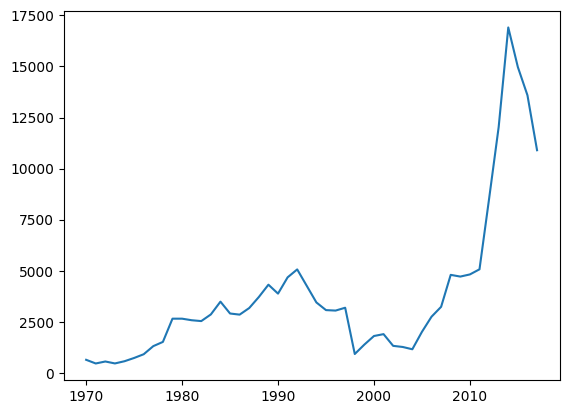

In [29]:
plt.plot(df_group['attacktype1_txt'])

In [30]:

# Number of attacks by region
attacks_by_region = df_terr['region_txt'].value_counts()

# Number of attacks by country

attacks_by_country = df_terr['city'].value_counts()
# attacks_by_country = df_terr.groupby('city').agg({'attacktype1_txt':'count'})

# Filter countries with more than 400 attacks
attacks_by_country_filtered = attacks_by_country[attacks_by_country>400]


<Axes: xlabel='region_txt'>

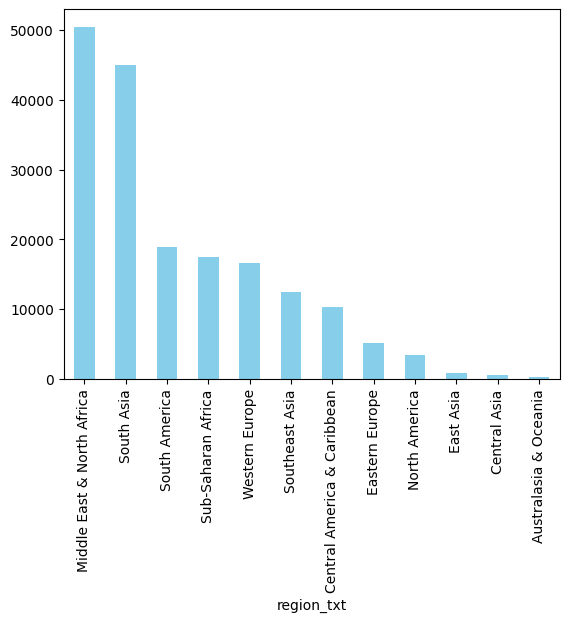

In [31]:
# plt.bar(df_att['attacktype1_txt'],df_att['city'])
attacks_by_region.plot(kind='bar',color='skyblue')

<Axes: xlabel='city'>

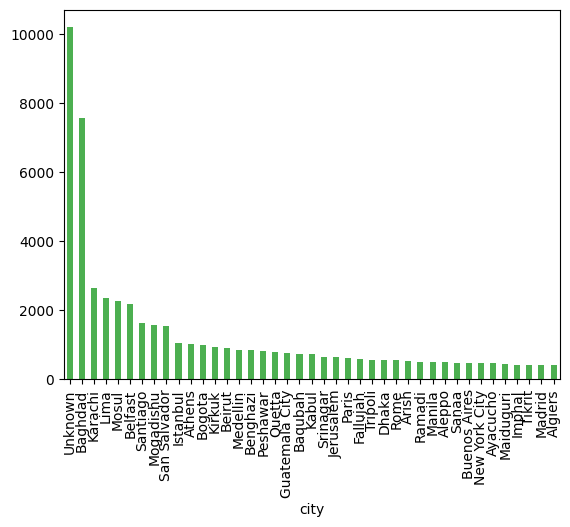

In [32]:
attacks_by_country_filtered.plot(kind='bar',color="#4CAF50")

In [33]:
# get only numerical columns
df_ = df_terr[['iyear', 'imonth', 'iday','extended','success','suicide','nkill']]
# df_.corr()
# df_

<Axes: >

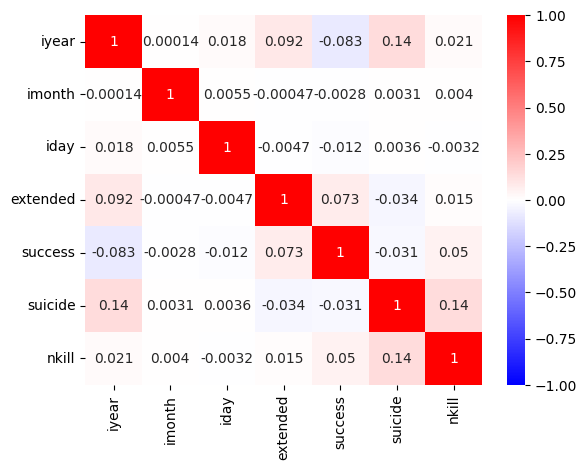

In [34]:
sns.heatmap(df_.corr(), annot=True, cmap='bwr', vmin=-1, vmax=1)

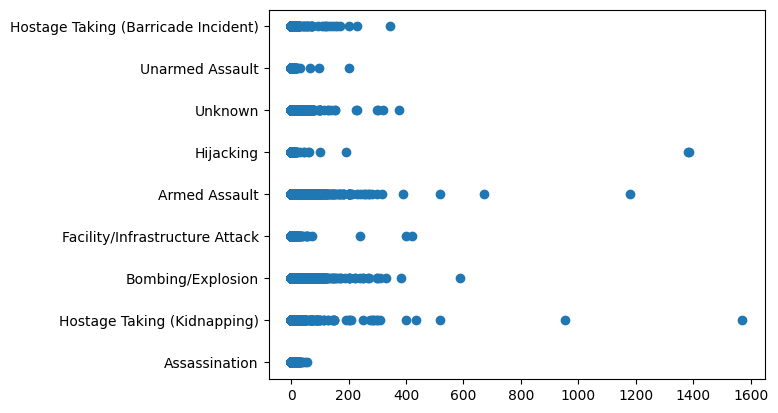

In [35]:
plt.scatter(data=df_terr, x='nkill', y='attacktype1_txt')

In [37]:
import plotly_express as px

In [56]:
attacks_by_country = df_terr.groupby('city')['nkill'].count()#.agg({'attacktype1_txt':'count'})
# attacks_by_country.columns=['city', 'total_count']

# Create a new DataFrame from the Series object
group_by_df = pd.DataFrame({'city': attacks_by_country.index, 'number_of_kills': attacks_by_country.values})#.sort_values('number_of_kills')
group_by_df.max()

city               zinarag
number_of_kills      10210
dtype: object

In [52]:
# create choropleth map
fig = px.choropleth(group_by_df, 
                    locations='city',
                    locationmode='country names',
                    color_continuous_scale="turbid",
                    color='number_of_kills',
                    hover_name='city',
                    projection='equirectangular')

fig.show()

In [57]:
import plotly.graph_objs as go

In [67]:
# Create a line chart using Plotly
group_by_year = df_terr.groupby('iyear')['nkill'].count()#.agg({'attacktype1_txt':'count'})

# Create a new DataFrame from the Series object
group_by_year_df = pd.DataFrame({'year': group_by_year.index, 'number_of_kills': group_by_year.values})#.sort_values('number_of_kills')

group_by_year_df = group_by_year_df.sort_values('year', ascending=False)

# group_by_year_df
fig = go.Figure(data=go.Scatter(x=group_by_year_df['year'], y=group_by_year_df['number_of_kills']))
fig.update_layout(title='kills over Time', xaxis_title='Year', yaxis_title='kills')
fig.show()

# Performance Comparison with Dask

In [80]:
ddf = dd.from_pandas(df_terr, npartitions=2)

In [81]:
import time

# Pandas operation
start_time_pandas = time.time()

grouped_pandas = df_terr.groupby(['iyear', 'region_txt'])['nkill'].sum().reset_index()

time_pandas = time.time() - start_time_pandas

# Dask operation
start_time_dask = time.time()

grouped_dask = ddf.groupby(['iyear', 'region_txt'])['nkill'].sum().reset_index()
grouped_dask = grouped_dask.compute()

time_dask = time.time() - start_time_dask

print("\nBenchmarking Results:")
print(f"Pandas Execution Time: {time_pandas} seconds")
print(f"Dask Execution Time: {time_dask} seconds")



Benchmarking Results:
Pandas Execution Time: 0.08112812042236328 seconds
Dask Execution Time: 0.08225393295288086 seconds


In [83]:
# Save as CSV
df_terr.to_csv('data.csv', index=False)